In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/input/df.csv', index_col='datetime')
df.index = pd.to_datetime(df.index, utc=True)

In [3]:
df.head()

,stepCount
datetime,
2017-06-27 23:04:40+00:00,504
2017-06-27 23:14:34+00:00,871
2017-06-27 23:22:53+00:00,25
2017-06-27 23:29:45+00:00,29
2017-06-27 23:36:05+00:00,17


In [4]:
df['datetimeja'] = df.index.tz_convert('Asia/Tokyo')

In [5]:
df['date'] = df['datetimeja'].dt.date
df['time'] = df['datetimeja'].dt.time

In [6]:
df.head()

,stepCount,datetimeja,date,time
datetime,,,,
2017-06-27 23:04:40+00:00,504,2017-06-28 08:04:40+09:00,2017-06-28,08:04:40
2017-06-27 23:14:34+00:00,871,2017-06-28 08:14:34+09:00,2017-06-28,08:14:34
2017-06-27 23:22:53+00:00,25,2017-06-28 08:22:53+09:00,2017-06-28,08:22:53
2017-06-27 23:29:45+00:00,29,2017-06-28 08:29:45+09:00,2017-06-28,08:29:45
2017-06-27 23:36:05+00:00,17,2017-06-28 08:36:05+09:00,2017-06-28,08:36:05


In [7]:
df.tail()

,stepCount,datetimeja,date,time
datetime,,,,
2019-02-02 02:16:31+00:00,184,2019-02-02 11:16:31+09:00,2019-02-02,11:16:31
2019-02-02 02:56:48+00:00,459,2019-02-02 11:56:48+09:00,2019-02-02,11:56:48
2019-02-02 06:31:36+00:00,1124,2019-02-02 15:31:36+09:00,2019-02-02,15:31:36
2019-02-02 06:41:36+00:00,658,2019-02-02 15:41:36+09:00,2019-02-02,15:41:36
2019-02-02 07:01:30+00:00,34,2019-02-02 16:01:30+09:00,2019-02-02,16:01:30


In [8]:
from datetime import date, timedelta, time

def date_range(start_date: date, end_date: date):
    diff = (end_date - start_date).days + 1
    return (start_date + timedelta(i) for i in range(diff))

In [9]:
dfs = []

for d in date_range(date(2019, 1, 1), date(2019, 2, 1)):
    
    try:
        tmp = df[df['date'] ==d][['stepCount', 'time']].reset_index(drop=True)
        tmp.iloc[0] = [0, time(0, 0, 0)]
        tmp.iloc[len(tmp) - 1] = [0, time(23, 59, 59)]    
        tmp['cumsumStepCount'] = tmp['stepCount'].cumsum()

        dfs.append(tmp)
    except:
        pass

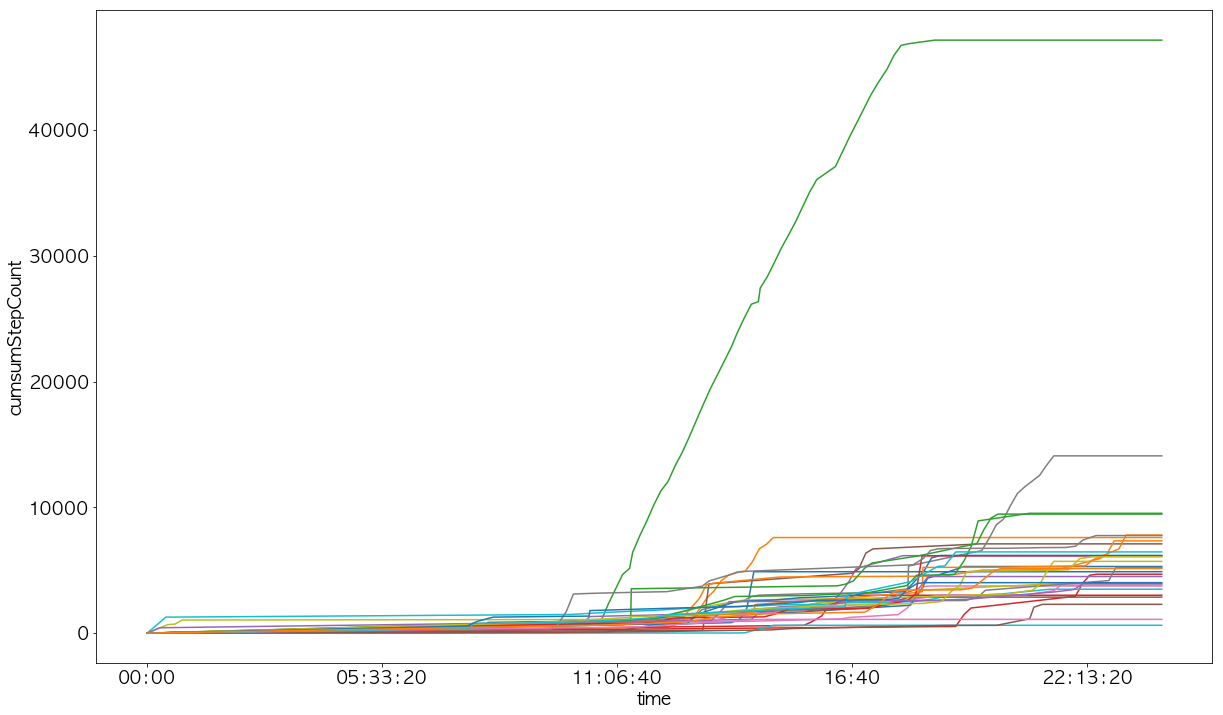

In [10]:
plt.figure(figsize=(20, 12))
plt.rcParams["font.size"] = 18
plt.ylabel('cumsumStepCount')

for _df in dfs:
    plt.plot(_df['time'], _df['cumsumStepCount'])